# Imports

In [1]:
import gzip
import json
import matplotlib.pyplot as plt
import numpy as np
import gensim.downloader
import copy
import warnings
import nltk
nltk.download('punkt')
#warnings.filterwarnings('ignore') #comment out to see warnings
from sklearn import tree
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\robin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Load File

In [2]:
f = gzip.open('goemotions.json.gz','rb') # Open .gz zip file
jsonFile = f.read()
y = json.loads(jsonFile)  # Store all contents into an array
y = np.array(y) # Convert array to np array

# Generate Pie Charts

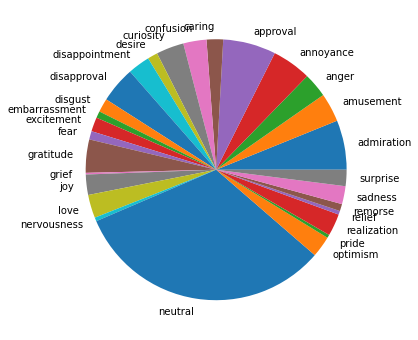

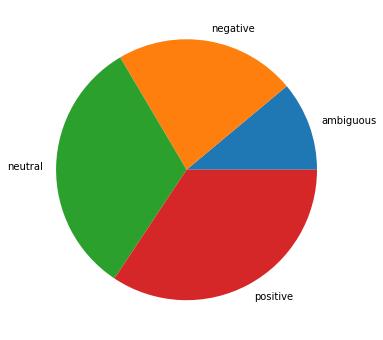

In [3]:
# Extract the 2nd and 3rd columns (emotions and sentiments)
emotions = y[:,1] 
sentiments = y[:,2]

# Count the total number of each emotion/sentiment
eValues, eCounts = np.unique(emotions, return_counts=True)
sValues, sCounts = np.unique(sentiments, return_counts=True)

efig = plt.figure(figsize=(6, 6))
plt.pie(eCounts, labels = eValues)
plt.show() 
efig.savefig('emotions.png', dpi=efig.dpi)
sfig = plt.figure(figsize=(6, 6))
plt.pie(sCounts, labels = sValues)
plt.show() 
sfig.savefig('sentiments.png', dpi=sfig.dpi)

# Process Dataset

In [4]:
corpus = y[:,0]
#Transform corpus to word count sparse matrix
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(corpus)
#Print the number of words
print(len(vectorizer.get_feature_names_out())) 

30449


# Process Dataset (NO STOP WORDS VERSION)

In [5]:
corpus = y[:,0]
#Transform corpus to word count sparse matrix
vectorizer = CountVectorizer(stop_words='english')
x = vectorizer.fit_transform(corpus)
#Print the number of words
print(len(vectorizer.get_feature_names_out())) 

30148


# Split Dataset

In [5]:
#Split the dataset and the emotions/sentiments into train and test with seed 1
corpus_nonvector_train, corpus_nonvector_test, corpus_train, corpus_test, emotions_train, emotions_test, sentiments_train, sentiments_test = train_test_split(corpus, x, emotions, sentiments, test_size=0.2, random_state=1)

# Base-MNB

In [34]:
#Create and train model
classifierMNBemotions = MultinomialNB()
modelMNBemotions = classifierMNBemotions.fit(corpus_train, emotions_train)
predictMNBemotions = modelMNBemotions.predict(corpus_test)

#Create confusion matrix and print metrics report
confusionMatrixMNBemotions = confusion_matrix(emotions_test, predictMNBemotions)
print(classification_report(emotions_test, predictMNBemotions, zero_division=0))

#Write everything to file
f = open("Base_MNB_emotions.txt", "w")
f.write("Base Multinomial Naive Bayes for emotions with alpha=1 \n")
f.write(np.array2string(confusionMatrixMNBemotions))
f.write("\n")
f.write(classification_report(emotions_test, predictMNBemotions, zero_division=0))
f.close()

                precision    recall  f1-score   support

    admiration       0.47      0.43      0.45      2126
     amusement       0.52      0.29      0.37      1212
         anger       0.46      0.13      0.20      1126
     annoyance       0.19      0.07      0.10      1686
      approval       0.23      0.08      0.12      2304
        caring       0.29      0.05      0.09       672
     confusion       0.35      0.05      0.09      1010
     curiosity       0.41      0.11      0.17      1113
        desire       0.33      0.05      0.09       380
disappointment       0.28      0.04      0.07       907
   disapproval       0.26      0.08      0.12      1523
       disgust       0.42      0.08      0.14       568
 embarrassment       0.57      0.01      0.03       312
    excitement       0.38      0.05      0.09       595
          fear       0.43      0.03      0.05       350
     gratitude       0.74      0.67      0.70      1404
         grief       0.00      0.00      0.00  

In [7]:
#Create and train model
classifierMNBsentiments = MultinomialNB()
modelMNBsentiments = classifierMNBsentiments.fit(corpus_train, sentiments_train)
predictMNBsentiments = modelMNBsentiments.predict(corpus_test)

#Create confusion matrix and print metrics report
confusionMatrixMNBsentiments = confusion_matrix(sentiments_test, predictMNBsentiments)
print(classification_report(sentiments_test, predictMNBsentiments, zero_division=0))

#Write everything to file
f = open("Base_MNB_sentiments.txt", "w")
f.write("Base Multinomial Naive Bayes for sentiments with alpha=1 \n")
f.write(np.array2string(confusionMatrixMNBsentiments))
f.write("\n")
f.write(classification_report(sentiments_test, predictMNBsentiments, zero_division=0))
f.close()

              precision    recall  f1-score   support

   ambiguous       0.42      0.23      0.30      3792
    negative       0.53      0.52      0.52      7752
     neutral       0.49      0.49      0.49     11075
    positive       0.61      0.70      0.65     11745

    accuracy                           0.54     34364
   macro avg       0.51      0.49      0.49     34364
weighted avg       0.53      0.54      0.53     34364



# Top-MNB

In [30]:
#Create and train model
classifierTopMNBemotions = MultinomialNB()
TMNBE = GridSearchCV(estimator=classifierTopMNBemotions, param_grid={'alpha': [0, 0.1, 0.5, 1]}, verbose=1)
TMNBE.fit(corpus_train, emotions_train)
print(TMNBE.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


{'alpha': 0.5}


In [35]:
#Create confusion matrix and print metrics report
predictTopMNBemotions = TMNBE.predict(corpus_test)
confusionMatrixTopMNBemotions = confusion_matrix(emotions_test, predictTopMNBemotions)
print(classification_report(emotions_test, predictTopMNBemotions, zero_division=0))

#Write everything to file
f = open("Top_MNB_emotions.txt", "w")
f.write("Top Multinomial Naive Bayes (using GridSearch) for emotions with variable alpha \n")
f.write(np.array2string(confusionMatrixTopMNBemotions))
f.write("\n")
f.write(classification_report(emotions_test, predictTopMNBemotions, zero_division=0))
f.close()

                precision    recall  f1-score   support

    admiration       0.45      0.50      0.48      2126
     amusement       0.51      0.45      0.48      1212
         anger       0.39      0.20      0.26      1126
     annoyance       0.19      0.11      0.14      1686
      approval       0.22      0.12      0.15      2304
        caring       0.26      0.15      0.19       672
     confusion       0.30      0.12      0.17      1010
     curiosity       0.32      0.18      0.23      1113
        desire       0.33      0.14      0.19       380
disappointment       0.19      0.07      0.10       907
   disapproval       0.20      0.12      0.15      1523
       disgust       0.35      0.15      0.21       568
 embarrassment       0.48      0.07      0.12       312
    excitement       0.24      0.08      0.12       595
          fear       0.30      0.09      0.14       350
     gratitude       0.70      0.74      0.72      1404
         grief       0.00      0.00      0.00  

In [36]:
#Create and train model
classifierTopMNBsentiments = MultinomialNB()
TMNBS = GridSearchCV(estimator=classifierTopMNBsentiments, param_grid={'alpha': [0, 0.1, 0.5, 1]}, verbose=1)
TMNBS.fit(corpus_train, sentiments_train)
print(TMNBS.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


{'alpha': 1}


In [37]:
#Create confusion matrix and print metrics report
predictTopMNBsentiments = TMNBS.predict(corpus_test)
confusionMatrixTopMNBsentiments = confusion_matrix(sentiments_test, predictTopMNBsentiments)
print(classification_report(sentiments_test, predictTopMNBsentiments, zero_division=0))

#Write everything to file
f = open("Top_MNB_sentiments.txt", "w")
f.write("Top Multinomial Naive Bayes (using GridSearch) for sentiments with variable alpha \n")
f.write(np.array2string(confusionMatrixTopMNBsentiments))
f.write("\n")
f.write(classification_report(emotions_test, predictTopMNBsentiments, zero_division=0))
f.close()

              precision    recall  f1-score   support

   ambiguous       0.42      0.23      0.30      3792
    negative       0.53      0.52      0.52      7752
     neutral       0.49      0.49      0.49     11075
    positive       0.61      0.70      0.65     11745

    accuracy                           0.54     34364
   macro avg       0.51      0.49      0.49     34364
weighted avg       0.53      0.54      0.53     34364



# Base-DT

In [38]:
classifierDTemotions = tree.DecisionTreeClassifier() 
modelDTemotions = classifierDTemotions.fit(corpus_train, emotions_train)
predictDTemotions = modelDTemotions.predict(corpus_test)

#Create confusion matrix and print metrics report
confusionMatrixDTemotions = confusion_matrix(emotions_test, predictDTemotions)
print(classification_report(emotions_test, predictDTemotions, zero_division=0))

#Write everything to file
f = open("Base_DT_emotions.txt", "w")
f.write("Base Decision Tree for emotions with alpha=1 \n")
f.write(np.array2string(confusionMatrixDTemotions))
f.write("\n")
f.write(classification_report(emotions_test, predictDTemotions, zero_division=0))
f.close()

                precision    recall  f1-score   support

    admiration       0.40      0.55      0.46      2126
     amusement       0.42      0.57      0.48      1212
         anger       0.26      0.38      0.31      1126
     annoyance       0.16      0.22      0.18      1686
      approval       0.19      0.26      0.22      2304
        caring       0.19      0.25      0.22       672
     confusion       0.25      0.30      0.27      1010
     curiosity       0.32      0.36      0.34      1113
        desire       0.20      0.27      0.23       380
disappointment       0.15      0.17      0.16       907
   disapproval       0.23      0.24      0.23      1523
       disgust       0.23      0.20      0.21       568
 embarrassment       0.22      0.18      0.20       312
    excitement       0.22      0.20      0.21       595
          fear       0.36      0.35      0.36       350
     gratitude       0.75      0.72      0.74      1404
         grief       0.17      0.15      0.16  

In [39]:
#Create and train model
classifierDTsentiments = tree.DecisionTreeClassifier()
modelDTsentiments = classifierDTsentiments.fit(corpus_train, sentiments_train)
predictDTsentiments = modelDTsentiments.predict(corpus_test)

#Create confusion matrix and print metrics report
confusionMatrixDTsentiments = confusion_matrix(sentiments_test, predictDTsentiments)
print(classification_report(sentiments_test, predictDTsentiments, zero_division=0))

#Write everything to file
f = open("Base_DT_sentiments.txt", "w")
f.write("Base Decision Tree for sentiments with alpha=1 \n")
f.write(np.array2string(confusionMatrixDTsentiments))
f.write("\n")
f.write(classification_report(sentiments_test, predictDTsentiments, zero_division=0))
f.close()

              precision    recall  f1-score   support

   ambiguous       0.35      0.47      0.40      3792
    negative       0.50      0.60      0.55      7752
     neutral       0.51      0.47      0.49     11075
    positive       0.70      0.59      0.64     11745

    accuracy                           0.54     34364
   macro avg       0.51      0.53      0.52     34364
weighted avg       0.55      0.54      0.54     34364



# Top-DT

In [40]:
parametersDT = {'criterion':('entropy', 'gini'), 'max_depth':[40, 120], 'min_samples_split':[40, 80, 120]}
classifierDTemotions = GridSearchCV(tree.DecisionTreeClassifier(), parametersDT) 

modelDTemotions = classifierDTemotions.fit(corpus_train, emotions_train)
predictDTemotions = modelDTemotions.predict(corpus_test)

#Create confusion matrix and print metrics report
confusionMatrixDTemotions = confusion_matrix(emotions_test, predictDTemotions)
print(classification_report(emotions_test, predictDTemotions, zero_division=0))

#Write everything to file
f = open("Top_DT_emotions.txt", "w")
f.write("Top Decision Tree for emotions with alpha=1 \n")
f.write(np.array2string(confusionMatrixDTemotions))
f.write("\n")
f.write(classification_report(emotions_test, predictDTemotions, zero_division=0))
f.close()

                precision    recall  f1-score   support

    admiration       0.48      0.39      0.43      2126
     amusement       0.49      0.53      0.51      1212
         anger       0.39      0.18      0.25      1126
     annoyance       0.06      0.00      0.01      1686
      approval       0.39      0.03      0.06      2304
        caring       0.18      0.03      0.04       672
     confusion       0.44      0.09      0.15      1010
     curiosity       0.74      0.06      0.12      1113
        desire       0.32      0.16      0.22       380
disappointment       0.05      0.00      0.00       907
   disapproval       0.15      0.01      0.01      1523
       disgust       0.63      0.07      0.13       568
 embarrassment       0.20      0.00      0.01       312
    excitement       0.37      0.09      0.14       595
          fear       0.67      0.02      0.03       350
     gratitude       0.84      0.73      0.78      1404
         grief       0.00      0.00      0.00  

In [41]:
parametersDT = {'criterion':('entropy', 'gini'), 'max_depth':[40, 120], 'min_samples_split':[40, 80, 120]}
classifierDTsentiments = GridSearchCV(tree.DecisionTreeClassifier(), parametersDT) 

modelDTsentiments = classifierDTsentiments.fit(corpus_train, sentiments_train)
predictDTsentiments = modelDTsentiments.predict(corpus_test)

#Create confusion matrix and print metrics report
confusionMatrixDTsentiments = confusion_matrix(sentiments_test, predictDTsentiments)
print(classification_report(sentiments_test, predictDTsentiments, zero_division=0))

#Write everything to file
f = open("Top_DT_sentiments.txt", "w")
f.write("Top Decision Tree for sentiments with alpha=1 \n")
f.write(np.array2string(confusionMatrixDTsentiments))
f.write("\n")
f.write(classification_report(sentiments_test, predictDTsentiments, zero_division=0))
f.close()

              precision    recall  f1-score   support

   ambiguous       0.39      0.28      0.32      3792
    negative       0.53      0.40      0.46      7752
     neutral       0.44      0.66      0.53     11075
    positive       0.69      0.55      0.61     11745

    accuracy                           0.52     34364
   macro avg       0.51      0.47      0.48     34364
weighted avg       0.54      0.52      0.52     34364



# Base-MLP

In [42]:
#Create and train model
classifierMLPemotions = MLPClassifier()
modelMLPemotions = classifierMLPemotions.fit(corpus_train, emotions_train)
predictMLPemotions = modelMLPemotions.predict(corpus_test)

#Create confusion matrix and print metrics report
confusionMatrixMLPemotions = confusion_matrix(emotions_test, predictMLPemotions)
print(classification_report(emotions_test, predictMLPemotions, zero_division=0))

#Write everything to file
f = open("Base_MLP_emotions.txt", "w")
f.write("Base Multi-Layered Perceptron for emotions with default parameters \n")
f.write(np.array2string(confusionMatrixMLPemotions))
f.write("\n")
f.write(classification_report(emotions_test, predictMLPemotions, zero_division=0))
f.close()

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


                precision    recall  f1-score   support

    admiration       0.49      0.47      0.48      2126
     amusement       0.46      0.50      0.48      1212
         anger       0.36      0.28      0.32      1126
     annoyance       0.17      0.14      0.15      1686
      approval       0.22      0.19      0.21      2304
        caring       0.21      0.21      0.21       672
     confusion       0.29      0.26      0.27      1010
     curiosity       0.33      0.38      0.35      1113
        desire       0.20      0.22      0.21       380
disappointment       0.16      0.17      0.16       907
   disapproval       0.24      0.23      0.23      1523
       disgust       0.22      0.22      0.22       568
 embarrassment       0.20      0.17      0.19       312
    excitement       0.21      0.17      0.19       595
          fear       0.33      0.41      0.37       350
     gratitude       0.73      0.74      0.74      1404
         grief       0.12      0.13      0.12  

In [ ]:
#Create and train model
classifierMLPsentiments = MLPClassifier()
modelMLPsentiments = classifierMLPsentiments.fit(corpus_train, sentiments_train)
predictMLPsentiments = modelMLPsentiments.predict(corpus_test)

#Create confusion matrix and print metrics report
confusionMatrixMLPsentiments = confusion_matrix(sentiments_test, predictMLPsentiments)
print(classification_report(sentiments_test, predictMLPsentiments, zero_division=0))

#Write everything to file
f = open("Base_MLP_sentiments.txt", "w")
f.write("Base Multi-Layered Perceptron for sentiments with default parameters \n")
f.write(np.array2string(confusionMatrixMLPsentiments))
f.write("\n")
f.write(classification_report(sentiments_test, predictMLPsentiments, zero_division=0))
f.close()

# Top-MLP

In [6]:
parametersMLP = {
    'activation': ('sigmoid', 'tanh', 'relu', 'identity'),
    'hidden_layer_sizes': ((30, 50,), (10,10,10,)),
    'solver': ('adam', 'sgd')
}

In [ ]:
topMLPemotions = GridSearchCV(MLPClassifier(tol=None, max_iter=8), parametersMLP)
topMLPemotions.fit(corpus_train, emotions_train)
#predictTopMLPemotions = topMLPemotions.predict(corpus_test)

#Create confusion matrix and print metrics report
#confusionMatrixTopMLPemotions = confusion_matrix(emotions_test, predictTopMLPemotions)
#print(classification_report(emotions_test, predictTopMLPemotions, zero_division=0))

#Write everything to file
#f = open("Top_MLP_emotions.txt", "w")
#f.write("Top Multi-Layered Perceptron for emotions with the following parameters: \n") #include hyper-parameters in string
#f.write(topMLPemotions.best_params_+ "\n")
#f.write(np.array2string(confusionMatrixTopMLPemotions))
#f.write("\n")
#f.write(classification_report(emotions_test, predictTopMLPemotions, zero_division=0))
#f.close()

In [ ]:
topMLPsentiments = GridSearchCV(MLPClassifier(), parametersMLP)
topMLPsentiments.fit(corpus_train, sentiments_train)
predictTopMLPsentiments = topMLPsentiments.predict(corpus_test)

#Create confusion matrix and print metrics report
confusionMatrixTopMLPsentiments = confusion_matrix(sentiments_test, predictTopMLPsentiments)
print(classification_report(sentiments_test, predictTopMLPsentiments, zero_division=0))

#Write everything to file
f = open("Top_MLP_sentiments.txt", "w")
f.write("Top Multi-Layered Perceptron for sentiments with the following parameters: \n")  #include hyper-parameters in string
f.write(topMLPsentiments.best_params_+ "\n")
f.write(np.array2string(confusionMatrixTopMLPsentiments))
f.write("\n")
f.write(classification_report(sentiments_test, predictDTsentiments, zero_division=0))
f.close()

# Embeddings

In [26]:
for model_name in list(gensim.downloader.info()['models'].keys()):
  print(model_name)

fasttext-wiki-news-subwords-300
conceptnet-numberbatch-17-06-300
word2vec-ruscorpora-300
word2vec-google-news-300
glove-wiki-gigaword-50
glove-wiki-gigaword-100
glove-wiki-gigaword-200
glove-wiki-gigaword-300
glove-twitter-25
glove-twitter-50
glove-twitter-100
glove-twitter-200
__testing_word2vec-matrix-synopsis


In [10]:
#Load the pre-trained model
embeddings = gensim.downloader.load("word2vec-google-news-300")

#Different models for exploration
#embeddings = gensim.downloader.load("fasttext-wiki-news-subwords-300")
#embeddings = gensim.downloader.load("glove-twitter-200")

[==------------------------------------------------] 5.4% 89.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[====----------------------------------------------] 9.2% 152.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======-------------------------------------------] 14.1% 233.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=========-----------------------------------------] 19.0% 315.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========---------------------------------------] 22.5% 373.5/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============-------------------------------------] 27.7% 460.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============-----------------------------------] 31.8% 528.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===================-------------------------------] 39.6% 657.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=====================-----------------------------] 43.8% 729.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[======================----------------------------] 45.8% 762.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=======================---------------------------] 47.8% 794.3/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=========================-------------------------] 51.1% 848.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========================-----------------------] 54.3% 903.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============================----------------------] 56.6% 940.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============================---------------------] 59.9% 995.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==============================--------------------] 61.8% 1028.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============================-------------------] 63.7% 1059.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================================----------------] 68.5% 1139.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===================================---------------] 70.4% 1170.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[====================================--------------] 72.2% 1201.4/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=====================================-------------] 75.3% 1251.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[======================================------------] 77.3% 1284.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========================================----------] 80.8% 1343.7/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=========================================---------] 83.8% 1392.8/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===========================================-------] 87.6% 1456.6/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=============================================-----] 90.2% 1499.1/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==============================================----] 93.8% 1558.9/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[===============================================---] 95.8% 1592.2/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================================================-] 98.1% 1632.0/1662.8MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================================================] 100.0% 1662.8/1662.8MB downloaded


# Tokenize

In [14]:
#Tokenize every word of the training set and store it into an array
trainTokens = [""]*len(corpus_nonvector_train)
for i in range(len(corpus_nonvector_train)):
    trainTokens[i]=word_tokenize(corpus_nonvector_train[i])
    
#Tokenize every word of the test set and store it into an array
testTokens = [""]*len(corpus_nonvector_test)
for i in range(len(corpus_nonvector_test)):
    testTokens[i]=word_tokenize(corpus_nonvector_test[i])

In [15]:
#Print the number of tokens overall
traintokencount=0
for i in range(len(trainTokens)):
    traintokencount+=len(trainTokens[i])
testtokencount=0
for i in range(len(testTokens)):
    testtokencount+=len(testTokens[i])
print(traintokencount+testtokencount)

2642128


# Embedding of each post - Hits and Misses

In [16]:
#Loop through the test and training set counting misses
trainmissesCount = 0
for i in range(len(trainTokens)):
    for j in range(len(trainTokens[i])):
        if(not embeddings.__contains__(trainTokens[i][j])):
            trainmissesCount+=1
print("%d hits and %d misses - %2.2f%% hit-rate for the training set" % (traintokencount-trainmissesCount, trainmissesCount, (1-trainmissesCount/traintokencount)*100))

testmissesCount=0
for i in range(len(testTokens)):
    for j in range(len(testTokens[i])):
        if(not embeddings.__contains__(testTokens[i][j])):
            testmissesCount+=1
print("%d hits and %d misses - %2.2f%% hit-rate for the test set" % (testtokencount-testmissesCount, testmissesCount, (1-testmissesCount/testtokencount)*100))
print("%d hits and %d misses - %2.2f%% hit-rate overall" % (traintokencount-trainmissesCount+testtokencount-testmissesCount, trainmissesCount+testmissesCount, (1-((trainmissesCount+testmissesCount)/(traintokencount+testtokencount)))*100))

1637338 hits and 476499 misses - 77.46% hit-rate for the training set
409007 hits and 119284 misses - 77.42% hit-rate for the test set
2046345 hits and 595783 misses - 77.45% hit-rate overall


# Embedding of each post

In [17]:
#Define embedding function - loops through a 2D array and converts it to embedding
def embed(arr):
    embeddedArr = []    
    for i in range(len(arr)):
        embeddedArr.append([])
        for j in range(len(arr[i])):
            if(embeddings.__contains__(arr[i][j])):
                embeddedArr[i].append(embeddings[arr[i][j]])
    return embeddedArr

#Embed the tokens of the training set
embeddedPostsTrain = []
embeddedPostsTrain = embed(trainTokens)

#Embed the tokens of the test set
embeddedPostsTest = []
embeddedPostsTest = embed(testTokens)

In [18]:
#Clean up the embedded vectors (Remove sentences with no words appearing in the model) as well as the corresponding entries in the y vectors
#Copy all of the y vectors
embedEmotionsTrain = copy.deepcopy(emotions_train)
embedEmotionsTest = copy.deepcopy(emotions_test)
embedSentimentsTrain = copy.deepcopy(sentiments_train)
embedSentimentsTest = copy.deepcopy(sentiments_test)

#Loop through the Training vectors, deleting the entries corresponding to empty embeds
i=0
while(i<len(embeddedPostsTrain)):
    if(not embeddedPostsTrain[i]):
        embeddedPostsTrain = np.delete(embeddedPostsTrain, i)
        embedEmotionsTrain = np.delete(embedEmotionsTrain, i)
        embedSentimentsTrain = np.delete(embedSentimentsTrain, i)
    else:
        i+=1

#Repeat for the test Sets
i=0
while(i<len(embeddedPostsTest)):
    if(not embeddedPostsTest[i]):
        embeddedPostsTest = np.delete(embeddedPostsTest, i)
        embedEmotionsTest = np.delete(embedEmotionsTest, i)
        embedSentimentsTest = np.delete(embedSentimentsTest, i)
    else:
        i+=1

C:\tools\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


# Compute average embedding

In [19]:
#Average the embeddings for the test set
embeddedTrain = []
for i in range(len(embeddedPostsTrain)):
    embeddedTrain.append(sum(embeddedPostsTrain[i])/len(embeddedPostsTrain[i]))
    
#Average the embeddings for the test set
embeddedTest = []
for i in range(len(embeddedPostsTest)):
    embeddedTest.append(sum(embeddedPostsTest[i])/len(embeddedPostsTest[i]))

# Base-MLP: Embeddings

In [24]:
#Create and train model
embedBaseMLPEmotions = MLPClassifier().fit(embeddedTrain, embedEmotionsTrain)
embedBaseMLPEmotions_pred = embedBaseMLPEmotions.predict(embeddedTest)

#Create confusion matrix and print metrics report
embedBaseMLPemotions_matrix = confusion_matrix(embedEmotionsTest, embedBaseMLPEmotions_pred)
print(classification_report(embedEmotionsTest, embedBaseMLPEmotions_pred, zero_division=0))

#Write everything to file
f = open("Base_MLP_emotions-Embeddings.txt", "w")
f.write("Base Multi-Layered Perceptron for emotions from the embedded Reddit posts with defaut parameters \n")
f.write(np.array2string(embedBaseMLPemotions_matrix))
f.write("\n")
f.write(classification_report(embedEmotionsTest, embedBaseMLPEmotions_pred, zero_division=0))
f.close()

C:\tools\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


                precision    recall  f1-score   support

    admiration       0.45      0.45      0.45      2125
     amusement       0.43      0.53      0.48      1210
         anger       0.39      0.22      0.28      1125
     annoyance       0.20      0.07      0.10      1684
      approval       0.35      0.05      0.09      2303
        caring       0.27      0.15      0.19       672
     confusion       0.28      0.11      0.16      1010
     curiosity       0.37      0.25      0.30      1111
        desire       0.27      0.21      0.23       380
disappointment       0.16      0.04      0.06       907
   disapproval       0.23      0.11      0.15      1523
       disgust       0.27      0.15      0.20       568
 embarrassment       0.27      0.11      0.15       312
    excitement       0.32      0.14      0.20       595
          fear       0.33      0.38      0.35       350
     gratitude       0.73      0.75      0.74      1404
         grief       0.14      0.08      0.10  

In [25]:
#Create and train model
embedBaseMLPSentiments = MLPClassifier().fit(embeddedTrain, embedSentimentsTrain)
embedBaseMLPSentiments_pred = embedBaseMLPSentiments.predict(embeddedTest)

#Create confusion matrix and print metrics report
embedBaseMLPSentiments_matrix = confusion_matrix(embedSentimentsTest, embedBaseMLPSentiments_pred)
print(classification_report(embedSentimentsTest, embedBaseMLPSentiments_pred, zero_division=0))

#Write everything to file
f = open("Base_MLP_sentiments-Embeddings.txt", "w")
f.write("Base Multi-Layered Perceptron for sentiments from the embedded Reddit posts with default parameters \n")
f.write(np.array2string(embedBaseMLPSentiments_matrix))
f.write("\n")
f.write(classification_report(embedSentimentsTest, embedBaseMLPSentiments_pred, zero_division=0))
f.close()

C:\tools\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


              precision    recall  f1-score   support

   ambiguous       0.48      0.19      0.27      3789
    negative       0.51      0.52      0.52      7749
     neutral       0.46      0.61      0.52     11067
    positive       0.68      0.60      0.64     11741

    accuracy                           0.54     34346
   macro avg       0.53      0.48      0.49     34346
weighted avg       0.55      0.54      0.53     34346



# Top-MLP: Embeddings

In [30]:
parametersMLP = {
    'activation': ('sigmoid', 'tanh', 'relu', 'identity'),
    'hidden_layer_sizes': ((30, 50,), (10,10,10,)),
    'solver': ('adam', 'sgd')
}

In [ ]:
#Create and train model
embedTopMLPEmotions = GridSearchCV(MLPClassifier(), parametersMLP).fit(embeddedTrain, embedEmotionsTrain)
embedTopMLPEmotions_pred = embedTopMLPEmotions.predict(embeddedTest)

#Create confusion matrix and print metrics report
embedTopMLPEmotions_matrix = confusion_matrix(embedEmotionsTest, embedTopMLPEmotions_pred)
print(classification_report(embedEmotionsTest, embedBaseMLPEmotions_pred, zero_division=0))

#Write everything to file
f = open("Top_MLP_emotions-Embeddings.txt", "w")
f.write("Top Multi-Layered Perceptron for emotions from the embedded Reddit posts with the following parameters: \n")
f.write(embedTopMLPEmotions.best_params_ + "\n")
f.write(np.array2string(embedBaseMLPEmotions_matrix))
f.write("\n")
f.write(classification_report(embedEmotionsTest, embedBaseMLPEmotions_pred, zero_division=0))
f.close()

C:\tools\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\tools\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\tools\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\tools\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
#Create and train model
embedTopMLPSentiments = GridSearchCV(MLPClassifier(), parametersMLP).fit(embeddedTrain, embedSentimentsTrain)
embedTopMLPSentiments_pred = embedTopMLPSentiments.predict(embeddedTest)

#Create confusion matrix and print metrics report
embedTopMLPSentiments_matrix = confusion_matrix(embedSentimentsTest, embedTopMLPSentiments_pred)
print(classification_report(embedSentimentsTest, embedBaseMLPSentiments_pred, zero_division=0))

#Write everything to file
f = open("Top_MLP_sentiments-Embeddings.txt", "w")
f.write("Top Multi-Layered Perceptron for sentiments from the embedded Reddit posts with the following parameters: \n")
f.write(embedTopMLPSentiments.best_params_ + "\n")
f.write(np.array2string(embedBaseMLPSentiments_matrix))
f.write("\n")
f.write(classification_report(embedSentimentsTest, embedBaseMLPSentiments_pred, zero_division=0))
f.close()